In [ ]:
from cadlab.scad import *
from solid2 import *

A gear is a mechanical device that can be used to transmit rotational motion.
It has a flat disk shape, with teeth on the edges and a hole in the center.

The hole is there to place the gear on an axle on which it can freely rotate and the teeth are there to transmit rotational motion to other gears or other mechanical components that also have teeth that are
spaced the same way.

Note that the center does not need to be circular. For example, if you wish to attach a leaver, you can
use a square hole in order to transmit angular momentum from the leaver to the cog.

Other things are possible too. For example, you might be able to connect the cog directly to a spiraling
spring in order to act as an energy storage device.

We start by creating the overall shape.

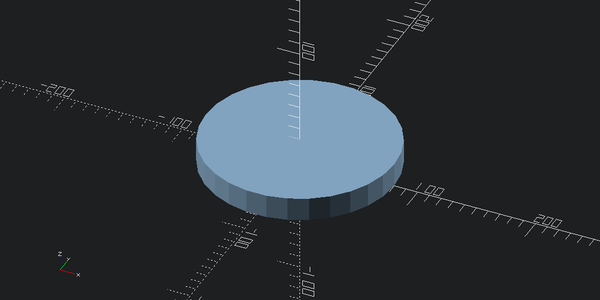

In [ ]:
cylinder(h=20,r=80)